In [159]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import plot_model
import pandas as pd
import numpy as np

wine_train = pd.read_csv('./data/skyggle_wine_Quality_Classification/train.csv', index_col='Unnamed: 0')
wine_test = pd.read_csv('./data/skyggle_wine_Quality_Classification/test.csv')
submission = pd.read_csv('./data/skyggle_wine_Quality_Classification/submission.csv')

In [131]:
wine_train

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,index,pH,residual sugar,sulphates,total sulfur dioxide,type,volatile acidity,quality
0,11.5,0.075,0.29,0.99650,8.3,12.0,2817,3.45,4.20,0.68,16.0,red,0.76,6
1,10.6,0.057,0.24,0.99519,6.7,64.0,2862,3.12,10.30,0.50,185.0,white,0.18,6
2,12.3,0.031,0.33,0.98987,6.8,22.0,2359,3.08,1.30,0.62,87.0,white,0.19,7
3,12.5,0.082,0.34,0.99356,7.6,26.0,1086,3.22,2.50,0.59,35.0,red,0.31,7
4,11.3,0.040,0.32,0.99182,6.3,37.0,973,3.24,4.20,0.43,117.0,white,0.17,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4117,9.5,0.052,0.25,0.99700,5.9,30.0,2149,3.24,11.30,0.44,165.0,white,0.25,6
4118,11.0,0.034,0.36,0.99220,6.4,43.0,1972,3.42,1.80,0.69,150.0,white,0.15,8
4119,10.0,0.047,0.25,0.99250,6.1,37.0,5291,3.35,1.30,0.46,173.0,white,0.14,6
4120,11.8,0.071,0.51,0.99524,8.5,45.0,2877,3.33,1.75,0.76,88.0,red,0.18,7


In [132]:
wine_train['quality'].value_counts()

6    1812
5    1341
7     693
4     139
8     114
3      19
9       4
Name: quality, dtype: int64

In [133]:
wine_test

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,index,pH,residual sugar,sulphates,total sulfur dioxide,type,volatile acidity
0,10.80,0.040,0.26,0.99238,7.3,36.0,4819,3.34,1.60,0.44,123.0,white,0.200
1,10.70,0.029,0.23,0.99272,7.8,39.0,1724,3.37,1.70,0.41,128.0,white,0.170
2,11.45,0.036,0.34,0.99097,6.0,52.0,78,3.44,1.00,0.44,184.0,white,0.240
3,9.30,0.086,0.41,0.99980,8.9,30.0,3846,3.27,7.90,0.57,109.0,red,0.595
4,12.10,0.101,0.53,0.99586,8.9,3.0,4270,3.21,4.00,0.59,10.0,red,0.480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370,12.10,0.033,0.30,0.99090,7.2,50.0,3486,3.33,2.10,0.43,158.0,white,0.260
1371,11.40,0.034,0.25,0.99082,6.6,23.0,1556,3.05,2.35,0.41,87.0,white,0.425
1372,9.40,0.048,0.24,0.99570,7.0,31.0,3263,3.23,6.20,0.62,228.0,white,0.320
1373,11.00,0.056,0.41,0.99396,7.9,6.0,112,3.29,1.50,0.71,35.0,red,0.330


In [134]:
submission

,no.,class
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
...,...,...
1370,1371,NaN
1371,1372,NaN
1372,1373,NaN
1373,1374,NaN


In [135]:
X = wine_train.drop(['quality'], axis=1)
y = wine_train['quality']
X = pd.get_dummies(X, columns=['type'])

In [136]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [137]:
X

array([[0.56451613, 0.14505495, 0.1746988 , ..., 0.45333333, 1.        ,
        0.        ],
       [0.41935484, 0.10549451, 0.14457831, ..., 0.06666667, 0.        ,
        1.        ],
       [0.69354839, 0.04835165, 0.19879518, ..., 0.07333333, 0.        ,
        1.        ],
       ...,
       [0.32258065, 0.08351648, 0.15060241, ..., 0.04      , 0.        ,
        1.        ],
       [0.61290323, 0.13626374, 0.30722892, ..., 0.06666667, 1.        ,
        0.        ],
       [0.70967742, 0.05274725, 0.25301205, ..., 0.16666667, 0.        ,
        1.        ]])

In [138]:
stop

NameError: name 'stop' is not defined

<AxesSubplot: >

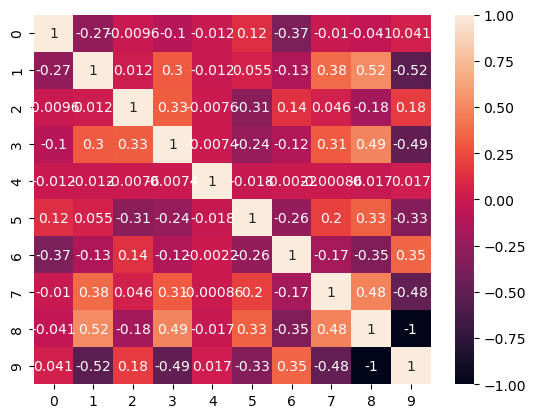

In [ ]:
import seaborn as sns
s_corr = pd.DataFrame(X) 
df_to_corr = s_corr.corr()
sns.heatmap(df_to_corr, annot=True)

In [ ]:
X

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,index,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity,type_red,type_white
0,11.5,0.075,0.29,0.99650,8.3,12.0,2817,3.45,4.20,0.68,16.0,0.76,1,0
1,10.6,0.057,0.24,0.99519,6.7,64.0,2862,3.12,10.30,0.50,185.0,0.18,0,1
2,12.3,0.031,0.33,0.98987,6.8,22.0,2359,3.08,1.30,0.62,87.0,0.19,0,1
3,12.5,0.082,0.34,0.99356,7.6,26.0,1086,3.22,2.50,0.59,35.0,0.31,1,0
4,11.3,0.040,0.32,0.99182,6.3,37.0,973,3.24,4.20,0.43,117.0,0.17,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4117,9.5,0.052,0.25,0.99700,5.9,30.0,2149,3.24,11.30,0.44,165.0,0.25,0,1
4118,11.0,0.034,0.36,0.99220,6.4,43.0,1972,3.42,1.80,0.69,150.0,0.15,0,1
4119,10.0,0.047,0.25,0.99250,6.1,37.0,5291,3.35,1.30,0.46,173.0,0.14,0,1
4120,11.8,0.071,0.51,0.99524,8.5,45.0,2877,3.33,1.75,0.76,88.0,0.18,1,0


In [141]:
y.value_counts()

6    1812
5    1341
7     693
4     139
8     114
3      19
9       4
Name: quality, dtype: int64

In [215]:
# X = np.delete(X, [3, 5, 10, 11], axis=1)

AttributeError: type object 'LearningRateScheduler' has no attribute 'lr'

In [216]:
model.optimizer.lr.numpy()

0.00083945645

In [240]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout
from keras import optimizers

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)

model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(14,)),
tf.keras.layers.Dense(1000),
tf.keras.layers.Activation("relu"),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(900),
tf.keras.layers.Activation("relu"),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(800),
tf.keras.layers.Activation("relu"),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(700),
tf.keras.layers.Activation("tanh"),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(600),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Activation("relu"),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(500),
tf.keras.layers.Activation("relu"),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(400),
tf.keras.layers.Activation("relu"),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(300),
tf.keras.layers.Activation("relu"),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(200),
tf.keras.layers.Activation("relu"),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(100),
tf.keras.layers.Activation("relu"),
tf.keras.layers.Dense(14),
tf.keras.layers.Activation("softmax"),
])
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', \
    optimizer=optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True))

checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='./tmp_checkpoints.ckpt', \
    save_weights_only=True, save_best_only=True, moniter='val_', \
        verbose=1)

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

def scheduler(epoch, lr):
    tf.print(f'learning_rate: {lr:.5f}')
    # 첫 5 에포크 동안 유지
    if epoch < 5:
        return lr
    else:
    # 학습률 감소 적용
        return lr * tf.math.exp(-0.1)

# 콜백 객체생성 및 scheduler 함수 적용
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

model.fit(X_train, y_train, \
    validation_data=(X_val, y_val),
    epochs=60,
    callbacks=[checkpoint, earlystopping, lr_scheduler])

learning_rate: 0.01000
Epoch 1/60
103/104 [============================>.] - ETA: 0s - loss: 1.3949 - accuracy: 0.3987
Epoch 1: val_loss improved from inf to 1.96270, saving model to .\tmp_checkpoints.ckpt
104/104 [==============================] - 4s 31ms/step - loss: 1.3952 - accuracy: 0.3985 - val_loss: 1.9627 - val_accuracy: 0.4388 - lr: 0.0100
learning_rate: 0.01000
Epoch 2/60
102/104 [============================>.] - ETA: 0s - loss: 1.2774 - accuracy: 0.4344
Epoch 2: val_loss improved from 1.96270 to 1.62756, saving model to .\tmp_checkpoints.ckpt
104/104 [==============================] - 3s 30ms/step - loss: 1.2755 - accuracy: 0.4365 - val_loss: 1.6276 - val_accuracy: 0.4848 - lr: 0.0100
learning_rate: 0.01000
Epoch 3/60
102/104 [============================>.] - ETA: 0s - loss: 1.2134 - accuracy: 0.4749
Epoch 3: val_loss improved from 1.62756 to 1.38608, saving model to .\tmp_checkpoints.ckpt
104/104 [==============================] - 3s 28ms/step - loss: 1.2157 - accuracy: 0

In [241]:
model.load_weights('./tmp_checkpoints.ckpt')

In [192]:
wine_test = pd.get_dummies(wine_test, columns=['type'])
wine_test.astype(int)
wine_test = scaler.transform(wine_test)
wine_test

ValueError: Data must be 1-dimensional

In [ ]:
# wine_test = np.delete(wine_test, [3, 5, 10, 11], axis=1)

In [242]:
wine_pred = model.predict(wine_test)

43/43 [==============================] - 0s 7ms/step


In [243]:
wine_pred

array([[0.0018554 , 0.00224557, 0.00124569, ..., 0.00160867, 0.00189891,
        0.00181139],
       [0.00250858, 0.00293176, 0.00167355, ..., 0.00222166, 0.00275055,
        0.00265869],
       [0.00255796, 0.00304219, 0.00170074, ..., 0.00227737, 0.00302745,
        0.00276681],
       ...,
       [0.00037238, 0.00026205, 0.00067831, ..., 0.00052307, 0.00027885,
        0.00033308],
       [0.00001663, 0.00002357, 0.00001407, ..., 0.00001759, 0.00001522,
        0.0000122 ],
       [0.00087014, 0.00120578, 0.00055578, ..., 0.00076063, 0.0013638 ,
        0.00108555]], dtype=float32)

In [209]:
np.set_printoptions(suppress=True)

In [244]:
answer = np.argmax(wine_pred, axis=-1)

In [247]:
pd.Series(answer).value_counts()

6    827
5    528
7     20
dtype: int64

In [248]:
submission['class'] = answer

In [231]:
submission

,no.,class
0,1,6
1,2,6
2,3,6
3,4,5
4,5,6
...,...,...
1370,1371,6
1371,1372,6
1372,1373,5
1373,1374,6


In [249]:
submission.to_csv('wine_classification.csv', index=False)